In [3]:
import os
import numpy as np
# 读取训练集、测试集
X_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\X_train.npy")
X_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\X_test.npy")
Y_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\y_train.npy")
Y_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\y_test.npy")
ids_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\ids_test.npy")
ids_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\sr_train.npy")
sr_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\sr_train.npy")
sr_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\sr_test.npy")

In [5]:
#X_train 变换
import os
import numpy as np
import librosa
import cv2
from tqdm import tqdm

# 设定参数
num_mfcc = 40  # MFCC 维数
target_size = (128, 128)  # CNN 适配的目标尺寸

# 初始化存储矩阵 (适配 CNN 输入)
num_samples = X_train.shape[0]
mfcc_features = np.zeros((num_samples, target_size[0], target_size[1]), dtype=np.uint8)  # (样本数, 128, 128)

# 计算 MFCC 并处理 (使用 tqdm 进度条)
for i, (signal, sample_rate) in enumerate(tqdm(zip(X_train, sr_train), total=num_samples, desc="Processing MFCC", unit="sample")):
    # 归一化信号到 [-1, 1]
    signal = signal.astype(np.float32)
    signal = signal / np.max(np.abs(signal))

    # 计算 MFCC
    mfcc = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=num_mfcc)
    mfcc = librosa.power_to_db(mfcc, ref=np.max)  # 转换为 dB 形式

    # **线性归一化到 [0,255]**
    mfcc_min, mfcc_max = np.min(mfcc), np.max(mfcc)
    mfcc_norm = (mfcc - mfcc_min) / (mfcc_max - mfcc_min)  # 归一化到 [0,1]
    mfcc_uint8 = (mfcc_norm * 255).astype(np.uint8)  # 归一化到 [0,255]

    # **调整尺寸到 (128×128)**
    mfcc_resized = cv2.resize(mfcc_uint8, target_size, interpolation=cv2.INTER_CUBIC)

    # 存入特征矩阵
    mfcc_features[i] = mfcc_resized

# **整理成 CNN 输入格式 (num_samples, 128, 128, 1)**
mfcc_features = np.expand_dims(mfcc_features, axis=-1)

# 保存转换后的特征
output_path = r"D:\Dataset\Temp_Results\MFCC\X_train_mfcc_cnn.npy"
np.save(output_path, mfcc_features)

print(f"✅ MFCC 计算完成！CNN 适配特征已保存至 {output_path}")


Processing MFCC: 100%|██████████| 468/468 [00:02<00:00, 221.53sample/s]

✅ MFCC 计算完成！CNN 适配特征已保存至 D:\Dataset\Temp_Results\MFCC\X_train_mfcc_cnn.npy


In [6]:
#X_test变换
import os
import numpy as np
import librosa
import cv2
from tqdm import tqdm

# 设定参数
num_mfcc = 40  # MFCC 维数
target_size = (128, 128)  # CNN 适配的目标尺寸

# 初始化存储矩阵 (适配 CNN 输入)
num_samples = X_test.shape[0]
mfcc_features = np.zeros((num_samples, target_size[0], target_size[1]), dtype=np.uint8)  # (样本数, 128, 128)

# 计算 MFCC 并处理 (使用 tqdm 进度条)
for i, (signal, sample_rate) in enumerate(tqdm(zip(X_test, sr_train), total=num_samples, desc="Processing MFCC", unit="sample")):
    # 归一化信号到 [-1, 1]
    signal = signal.astype(np.float32)
    signal = signal / np.max(np.abs(signal))

    # 计算 MFCC
    mfcc = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=num_mfcc)
    mfcc = librosa.power_to_db(mfcc, ref=np.max)  # 转换为 dB 形式

    # **线性归一化到 [0,255]**
    mfcc_min, mfcc_max = np.min(mfcc), np.max(mfcc)
    mfcc_norm = (mfcc - mfcc_min) / (mfcc_max - mfcc_min)  # 归一化到 [0,1]
    mfcc_uint8 = (mfcc_norm * 255).astype(np.uint8)  # 归一化到 [0,255]

    # **调整尺寸到 (128×128)**
    mfcc_resized = cv2.resize(mfcc_uint8, target_size, interpolation=cv2.INTER_CUBIC)

    # 存入特征矩阵
    mfcc_features[i] = mfcc_resized

# **整理成 CNN 输入格式 (num_samples, 128, 128, 1)**
mfcc_features = np.expand_dims(mfcc_features, axis=-1)

# 保存转换后的特征
output_path = r"D:\Dataset\Temp_Results\MFCC\X_test_mfcc_cnn.npy"
np.save(output_path, mfcc_features)

print(f"✅ MFCC 计算完成！CNN 适配特征已保存至 {output_path}")


Processing MFCC: 100%|██████████| 117/117 [00:00<00:00, 201.22sample/s]

✅ MFCC 计算完成！CNN 适配特征已保存至 D:\Dataset\Temp_Results\MFCC\X_test_mfcc_cnn.npy


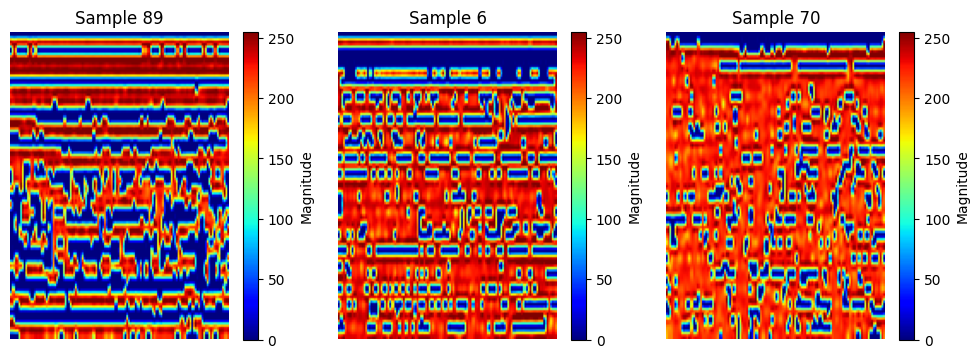

In [17]:
import random
import matplotlib.pyplot as plt

# 随机选择 3 个样本索引
random_indices = random.sample(range(num_samples), 3)

# **绘制随机选择的 3 张小波变换图像**
plt.figure(figsize=(12, 4))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 3, i + 1)
    plt.imshow(mfcc_features[idx], cmap='jet', aspect='auto')
    plt.colorbar(label="Magnitude")
    plt.title(f"Sample {idx}")
    plt.axis("off")  # 关闭坐标轴
plt.show()